1. Розробити засоби для облiку сервiсного обслуговування автомобiлiв.
Працiвник характеризується власним числовим iдентифiкатором, прiзвищем i iдентифiкатором бригади.
Бригада характеризується числовим iдентифiкатором, назвою i тарифом оплати працi її працiвника за 1 год.
Наряд на обслуговування мiстить дату, iдентифiкатор працiвника, затрачений час в годинах, марку автомобiля.
Наряди про надання сервiсiв поданi кiлькома (не менше 2) окремими
csv-файлами, також окремими файлами подано данi про бригади та
працiвникiв.
2. Вивести:
(а) таблицю, в якiй для кожної бригади пораховано заробленi кошти
за весь час;
(б) дiаграму до попереднього пункту;
(в) таблицю, в якiй для кожного працiвника пораховано кошти, заробленi ним за перiод часу, визначений вiджетами;
(г) таблицю, в якiй подано заробленi кошти на кожнiй марцi автомобiлiв, впорядкованi за цiєю сумою.

In [110]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact

In [111]:
workers = pd.read_csv('workers.csv',index_col='id_worker')
display(workers)

,surname,id_team
id_worker,,
1,Banduryst,12
2,Burdiak,12
3,Chushak,13
4,Serednya,13
5,Stasyshyn,14


In [112]:
brigada = pd.read_csv('brigada.csv', index_col = "id_team")
display(brigada)

,name,price
id_team,,
14,PMI,200
12,PMO,300
13,PMK,400


In [113]:
nariads=pd.concat([pd.read_csv('naryad2.csv'), pd.read_csv('naryad1.csv')])
nariads

,date,id_worker,time,car
0,2023-12-4,5,10,BMW
1,2023-12-4,1,7,Audi
2,2023-12-4,2,5,Mercedes
3,2023-12-4,2,10,Dodge
4,2023-12-4,3,15,Porsche
5,2023-12-4,3,13,Audi
6,2023-12-4,4,7,Mazda
7,2023-12-4,4,15,BMW
8,2023-12-4,5,10,Lincoln
9,2023-12-5,5,10,BMW


In [114]:
table = nariads.join(workers, on = "id_worker").join(brigada, on ="id_team")
table

,date,id_worker,time,car,surname,id_team,name,price
0,2023-12-4,5,10,BMW,Stasyshyn,14,PMI,200
1,2023-12-4,1,7,Audi,Banduryst,12,PMO,300
2,2023-12-4,2,5,Mercedes,Burdiak,12,PMO,300
3,2023-12-4,2,10,Dodge,Burdiak,12,PMO,300
4,2023-12-4,3,15,Porsche,Chushak,13,PMK,400
5,2023-12-4,3,13,Audi,Chushak,13,PMK,400
6,2023-12-4,4,7,Mazda,Serednya,13,PMK,400
7,2023-12-4,4,15,BMW,Serednya,13,PMK,400
8,2023-12-4,5,10,Lincoln,Stasyshyn,14,PMI,200
9,2023-12-5,5,10,BMW,Stasyshyn,14,PMI,200


In [115]:
table = table.sort_values(by='name')
df_sorted

,date,id_worker,time,car,surname,id_team,name,price
0,01-11-2023,5,10,BMW,Stasyshyn,14,PMI,200
8,09-11-2023,5,10,Lincoln,Stasyshyn,14,PMI,200
8,09-12-2023,5,7,Bentley,Stasyshyn,14,PMI,200
4,05-11-2023,3,15,Porsche,Chushak,13,PMK,400
5,06-11-2023,3,13,Audi,Chushak,13,PMK,400
6,07-11-2023,4,7,Mazda,Serednya,13,PMK,400
7,08-11-2023,4,15,BMW,Serednya,13,PMK,400
7,08-12-2023,4,11,BMW,Serednya,13,PMK,400
4,05-12-2023,3,8,BMW,Chushak,13,PMK,400
5,06-12-2023,3,9,Koenigsegg,Chushak,13,PMK,400


In [116]:
table['summary'] = table['price']*table['time']    
display(table)

,date,id_worker,time,car,surname,id_team,name,price,summary
0,2023-12-4,5,10,BMW,Stasyshyn,14,PMI,200,2000
17,2023-12-2,5,7,Bentley,Stasyshyn,14,PMI,200,1400
8,2023-12-1,5,7,Bentley,Stasyshyn,14,PMI,200,1400
17,2023-12-5,5,10,Lincoln,Stasyshyn,14,PMI,200,2000
9,2023-12-5,5,10,BMW,Stasyshyn,14,PMI,200,2000
8,2023-12-4,5,10,Lincoln,Stasyshyn,14,PMI,200,2000
26,2023-12-3,5,7,Bentley,Stasyshyn,14,PMI,200,1400
7,2023-12-4,4,15,BMW,Serednya,13,PMK,400,6000
24,2023-12-3,4,15,Mazda,Serednya,13,PMK,400,6000
23,2023-12-3,3,9,Koenigsegg,Chushak,13,PMK,400,3600


In [117]:
sum_by_name= table.groupby('name')['summary'].sum()
sum_by_name
 #сума заробітку для кожної бригади

name
PMI    12200
PMK    91600
PMO    53700
Name: summary, dtype: int64

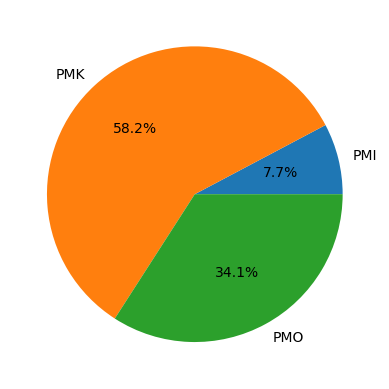

In [118]:
sum_by_name.plot(kind='pie', autopct='%1.1f%%')
plt.title('')
plt.ylabel('')
plt.show()

In [124]:
table = table.sort_values(by='date')

start_date_dropdown = widgets.Dropdown(
    options=table['date'].sort_values().unique(),
    value=table['date'].min(),
    description='Початкова дата:'
)

end_date_dropdown = widgets.Dropdown(
    options=table['date'].sort_values().unique(),
    value=table['date'].max(),
    description='Кінцева дата:'
)

def show_summary(start_date, end_date):
    filtered_table = table[(table['date'] >= start_date) & (table['date'] <= end_date)]
    total_earnings = filtered_table.groupby('surname')['summary'].sum()
    #display(filtered_table)
    print(f"Сума заробітку за обраний діапазон дат: {total_earnings}")


start_date_dropdown, end_date_dropdown
interact(show_summary, start_date=start_date_dropdown, end_date=end_date_dropdown)


interactive(children=(Dropdown(description='Початкова дата:', options=('2023-12-1', '2023-12-2', '2023-12-3', …

<function __main__.show_summary(start_date, end_date)>

In [121]:
workers_profit= table.groupby('surname')['summary'].sum()
display(workers_profit)

surname
Banduryst    25800
Burdiak      27900
Chushak      42800
Serednya     48800
Stasyshyn    12200
Name: summary, dtype: int64

In [135]:
sum_by_name = table.groupby('car')['summary'].sum().reset_index()  
sum_by_name_sorted = sum_by_name.sort_values(by='summary', ascending=False)

display(sum_by_name_sorted)


,car,summary
1,BMW,38800
0,Audi,28100
7,Mazda,23600
9,Porsche,20100
5,Lamborgini,11700
4,Koenigsegg,10800
8,Mercedes,10200
3,Dodge,6000
2,Bentley,4200
6,Lincoln,4000
